In [60]:
%matplotlib inline
import psrchive as psr
import matplotlib.pyplot as plt
import numpy as np

In [61]:
ar = psr.Archive_load("total.ZZc")
ar.pscrunch()
ar.tscrunch()

In [81]:
subint = ar.get_Integration(0)
(bl_mean, bl_var) = subint.baseline_stats()
bl_mean = bl_mean.squeeze()
bl_var = bl_var.squeeze()
non_zeroes = np.where(bl_mean != 0.0)

In [82]:
freqs = np.linspace(102.34375, 197.4609375, ar.get_nchan()) # how to get min/max freq from the archive?
print bl_mean[non_zeroes].shape, len(non_zeroes[0])

(451,) 451


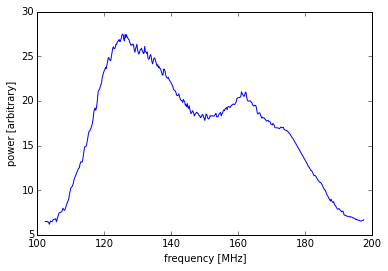

In [99]:
fig1 = plt.plot(freqs[non_zeroes],bl_mean[non_zeroes])
xlab = plt.xlabel('frequency [MHz]')
ylab = plt.ylabel('power [arbitrary]')

In [68]:
data =ar.get_data()
data = data.squeeze()

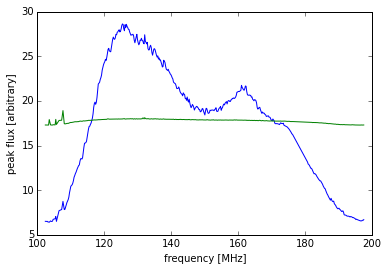

In [100]:
peak_value = np.amax(data, axis=1)
fig2 = plt.plot(freqs[non_zeroes],peak_value[non_zeroes])
peak_values_corrected = peak_value[non_zeroes] / bl_mean[non_zeroes] * np.average(bl_mean[non_zeroes])
fig2 = plt.plot(freqs[non_zeroes],peak_values_corrected)
xlab = plt.xlabel('frequency [MHz]')
ylab = plt.ylabel('peak flux [arbitrary]')

In [95]:
ar.remove_baseline()
data_br = ar.get_data()
data_br = data_br.squeeze()
peak_value_br = np.amax(data_br, axis=1)
peak_value_br_corrected = peak_value_br[non_zeroes] / bl_mean[non_zeroes] * np.average(bl_mean[non_zeroes])

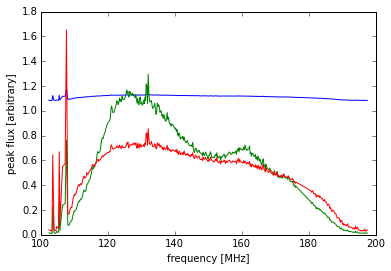

In [101]:
fig3 = plt.plot(freqs[non_zeroes], peak_values_corrected / np.average(bl_mean))
fig3 = plt.plot(freqs[non_zeroes], peak_value_br[non_zeroes])
fig3 = plt.plot(freqs[non_zeroes], peak_value_br_corrected)
xlab = plt.xlabel('frequency [MHz]')
ylab = plt.ylabel('peak flux [arbitrary]')

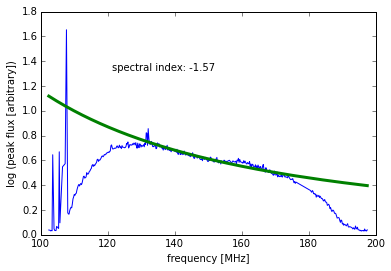

In [173]:
first=141
last=363
fit=np.polyfit(np.log10((freqs[non_zeroes])[first:last]), np.log10(peak_value_br_corrected[first:last]), 1)
fig4 = plt.plot(freqs[non_zeroes], peak_value_br_corrected)
fig4 = plt.plot(freqs[non_zeroes], np.power(10., np.log10(freqs[non_zeroes])*fit[0] + fit[1]), linewidth=3)
xlab = plt.xlabel('frequency [MHz]')
ylab = plt.ylabel('log (peak flux [arbitrary])')
fig4 = plt.text(freqs[ar.get_nchan()/5], np.amax(peak_value_br_corrected) * 0.8,
                "spectral index: "+str(int(fit[0]*100)/100.))